# Linear Regression on QM9 data
### Label gap
#### features renamed

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### qm9_all.csv is included in an archive file in the same folder

In [2]:
raw_data = pd.read_csv('qm9_all.csv')
raw_data.head()

,gap,ftu1,ftu2,ftu3,ftu4,ftu5,ftu6,ftu7,ftu8,ftu9,...,ftu154,ftu155,ftu156,ftu157,ftu158,ftu159,ftu160,ftu161,ftu162,ftu163
0,0.5048,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.187493
1,0.3399,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.228070
2,0.3615,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.156089
3,0.3351,0.974937,0.000625,1.570000e-06,2.190000e-09,2.300000e-07,1.100000e-06,1.500000e-07,0.000038,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,1.000000e+00,0.168378,4.700000e-08,0.166633,0.160976
4,0.3796,0.974937,0.000646,1.570000e-06,7.500000e-11,1.170000e-07,1.100000e-06,5.280000e-08,0.000033,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.197878


In [3]:
raw_data.describe(include='all')

,gap,ftu1,ftu2,ftu3,ftu4,ftu5,ftu6,ftu7,ftu8,ftu9,...,ftu154,ftu155,ftu156,ftu157,ftu158,ftu159,ftu160,ftu161,ftu162,ftu163
count,133885.000000,133885.000000,133885.000000,1.338850e+05,1.338850e+05,1.338850e+05,1.338850e+05,1.338850e+05,133885.000000,133885.000000,...,1.338850e+05,133885.000000,1.338850e+05,133885.000000,1.338850e+05,1.338850e+05,133885.000000,1.338850e+05,133885.000000,133885.000000
mean,0.251100,0.861224,0.006409,1.521402e-03,2.452571e-03,1.548950e-03,1.917757e-03,5.469812e-03,0.003792,0.020456,...,6.518926e-02,0.005768,2.293760e-02,0.163808,9.149683e-03,1.011540e-01,0.170559,1.463843e-02,0.173879,0.317016
std,0.047519,0.108996,0.003880,6.312036e-04,1.552160e-03,9.756258e-04,4.813187e-04,4.169740e-03,0.002516,0.025184,...,2.468584e-01,0.073852,1.497051e-01,0.075721,9.521552e-02,3.015336e-01,0.042525,1.185325e-01,0.077366,0.092110
min,0.024600,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.023618
25%,0.216300,0.790194,0.003778,1.039987e-03,1.400653e-03,8.926130e-04,1.781174e-03,2.274259e-03,0.001880,0.003210,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.262702
50%,0.249400,0.878187,0.005487,1.468291e-03,2.108546e-03,1.329561e-03,2.040303e-03,4.446247e-03,0.003213,0.011170,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.319758
75%,0.288200,0.955748,0.007919,2.033744e-03,3.127838e-03,1.963294e-03,2.242159e-03,7.634490e-03,0.005111,0.027772,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.378115
max,0.622100,0.998183,0.036156,4.048517e-03,1.951057e-02,1.279171e-02,2.706603e-03,2.709209e-02,0.016903,0.233448,...,1.000000e+00,0.984491,1.000000e+00,0.999979,1.000000e+00,1.000000e+00,1.000000,9.999997e-01,1.000000,0.619620


In [4]:
raw_data.isnull().sum()

gap       0
ftu1      0
ftu2      0
ftu3      0
ftu4      0
         ..
ftu159    0
ftu160    0
ftu161    0
ftu162    0
ftu163    0
Length: 164, dtype: int64

#### There are no missing values in the data

<AxesSubplot:xlabel='gap', ylabel='Count'>

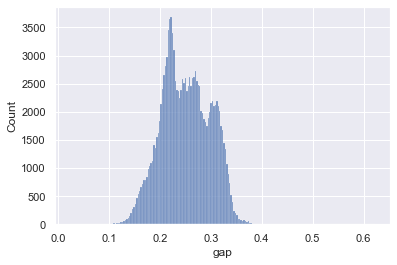

In [5]:
sns.histplot(raw_data['gap'])

#### Apparrently there are some outliers in our data so we'll remove a very small proportion of our data (two points, to be exact)

<AxesSubplot:xlabel='gap', ylabel='Count'>

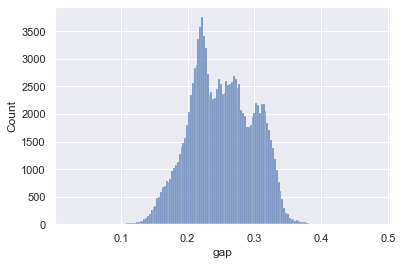

In [6]:
U = raw_data['gap'].quantile(0.99999)
data_1 = raw_data[raw_data['gap'] < U]
sns.histplot(data_1['gap'])

In [7]:
data_1.describe(include = 'all')

,gap,ftu1,ftu2,ftu3,ftu4,ftu5,ftu6,ftu7,ftu8,ftu9,...,ftu154,ftu155,ftu156,ftu157,ftu158,ftu159,ftu160,ftu161,ftu162,ftu163
count,133883.000000,133883.000000,133883.000000,1.338830e+05,1.338830e+05,1.338830e+05,1.338830e+05,1.338830e+05,133883.000000,133883.000000,...,1.338830e+05,133883.000000,1.338830e+05,133883.000000,1.338830e+05,1.338830e+05,133883.000000,1.338830e+05,133883.000000,133883.000000
mean,0.251096,0.861230,0.006409,1.521423e-03,2.452608e-03,1.548973e-03,1.917786e-03,5.469894e-03,0.003793,0.020456,...,6.519024e-02,0.005769,2.293794e-02,0.163808,9.149820e-03,1.011555e-01,0.170559,1.463864e-02,0.173879,0.317018
std,0.047503,0.108971,0.003880,6.311838e-04,1.552143e-03,9.756148e-04,4.812664e-04,4.169717e-03,0.002516,0.025184,...,2.468601e-01,0.073852,1.497062e-01,0.075722,9.521622e-02,3.015356e-01,0.042525,1.185334e-01,0.077367,0.092110
min,0.024600,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.023618
25%,0.216300,0.790194,0.003778,1.039987e-03,1.400653e-03,8.926130e-04,1.781174e-03,2.274482e-03,0.001880,0.003210,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.262734
50%,0.249400,0.878187,0.005487,1.468291e-03,2.108546e-03,1.329561e-03,2.040303e-03,4.446247e-03,0.003213,0.011170,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.319758
75%,0.288200,0.955748,0.007919,2.033744e-03,3.127838e-03,1.963294e-03,2.242159e-03,7.634490e-03,0.005111,0.027773,...,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.378116
max,0.480200,0.998183,0.036156,4.048517e-03,1.951057e-02,1.279171e-02,2.706603e-03,2.709209e-02,0.016903,0.233448,...,1.000000e+00,0.984491,1.000000e+00,0.999979,1.000000e+00,1.000000e+00,1.000000,9.999997e-01,1.000000,0.619620


#### Checking multicollinearity

In [8]:
data_f = data_1.drop(['gap'],axis = 1)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_f
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

C:\Users\Arash\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [10]:
vif

,VIF,features
0,7.847642,ftu1
1,15.566570,ftu2
2,95.877654,ftu3
3,27627.018131,ftu4
4,25538.691840,ftu5
...,...,...
158,7.313800,ftu159
159,1.233258,ftu160
160,1.881272,ftu161
161,2.384199,ftu162


In [11]:
Vless = vif[vif['VIF']<5]
Vless

,VIF,features
19,3.590624,ftu20
20,2.977122,ftu21
21,3.336438,ftu22
27,3.855331,ftu28
33,3.592864,ftu34
40,1.942401,ftu41
58,4.305714,ftu59
64,3.537718,ftu65
65,3.013886,ftu66
66,3.585777,ftu67


In [12]:
data_1.head()

,gap,ftu1,ftu2,ftu3,ftu4,ftu5,ftu6,ftu7,ftu8,ftu9,...,ftu154,ftu155,ftu156,ftu157,ftu158,ftu159,ftu160,ftu161,ftu162,ftu163
1,0.3399,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.228070
2,0.3615,0.000020,0.000577,3.880000e-15,2.720000e-11,1.030000e-07,4.100000e-13,1.640000e-11,0.000019,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.156089
3,0.3351,0.974937,0.000625,1.570000e-06,2.190000e-09,2.300000e-07,1.100000e-06,1.500000e-07,0.000038,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,1.000000e+00,0.168378,4.700000e-08,0.166633,0.160976
4,0.3796,0.974937,0.000646,1.570000e-06,7.500000e-11,1.170000e-07,1.100000e-06,5.280000e-08,0.000033,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.197878
5,0.2263,0.752965,0.000597,1.570000e-06,9.850000e-10,1.890000e-07,1.100000e-06,8.280000e-08,0.000035,0.000001,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,2.960000e-11,0.168378,4.700000e-08,0.166633,0.188353


In [13]:
data_1[Vless['features']]


,ftu20,ftu21,ftu22,ftu28,ftu34,ftu41,ftu59,ftu65,ftu66,ftu67,...,ftu151,ftu154,ftu155,ftu156,ftu157,ftu158,ftu160,ftu161,ftu162,ftu163
1,9.260000e-11,5.860000e-17,0.000001,0.002319,4.140000e-13,3.240000e-10,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.228070
2,9.260000e-11,5.860000e-17,0.000001,0.002319,4.140000e-13,3.240000e-10,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.156089
3,9.260000e-11,5.860000e-17,0.000001,0.002319,2.690000e-07,9.999549e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.160976
4,9.260000e-11,5.860000e-17,0.000001,0.011584,8.000000e-08,9.999549e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.197878
5,9.260000e-11,5.860000e-17,0.475900,0.011584,1.130000e-06,9.998351e-01,0.002152,5.202347e-01,3.610000e-15,0.14598,...,0.156346,2.390000e-20,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.188353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,6.543049e-01,5.860000e-17,0.000001,0.947306,2.880000e-07,9.492836e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,1.000000e+00,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.235251
133881,6.577767e-01,5.860000e-17,0.000001,0.394081,2.880000e-07,9.492836e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,1.000000e+00,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.229194
133882,7.870933e-01,5.860000e-17,0.000001,0.072556,2.880000e-07,9.932409e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,1.000000e+00,0.945901,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.211842
133883,8.949214e-01,3.929068e-01,0.000001,0.264161,3.220000e-07,9.950268e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,0.156346,9.999795e-01,0.000000,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.282608


In [14]:
data_2 = data_1[Vless['features']]

In [15]:
data_2['gap'] = data_1['gap']

C:\Users\Arash\AppData\Local\Temp/ipykernel_6628/2295493228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['gap'] = data_1['gap']


In [16]:
data_2.head()

,ftu20,ftu21,ftu22,ftu28,ftu34,ftu41,ftu59,ftu65,ftu66,ftu67,...,ftu154,ftu155,ftu156,ftu157,ftu158,ftu160,ftu161,ftu162,ftu163,gap
1,9.260000e-11,5.860000e-17,0.000001,0.002319,4.140000e-13,3.240000e-10,0.002152,5.760000e-21,3.610000e-15,0.14598,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.228070,0.3399
2,9.260000e-11,5.860000e-17,0.000001,0.002319,4.140000e-13,3.240000e-10,0.002152,5.760000e-21,3.610000e-15,0.14598,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.156089,0.3615
3,9.260000e-11,5.860000e-17,0.000001,0.002319,2.690000e-07,9.999549e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.160976,0.3351
4,9.260000e-11,5.860000e-17,0.000001,0.011584,8.000000e-08,9.999549e-01,0.002152,5.760000e-21,3.610000e-15,0.14598,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.197878,0.3796
5,9.260000e-11,5.860000e-17,0.475900,0.011584,1.130000e-06,9.998351e-01,0.002152,5.202347e-01,3.610000e-15,0.14598,...,2.390000e-20,0.0,8.340000e-25,0.156951,4.030000e-08,0.168378,4.700000e-08,0.166633,0.188353,0.2263


#### Defining input and output and scaling the data

In [17]:
targets = data_2['gap']
inputs = data_2.drop(['gap'] , axis = 1)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [19]:
inputs_scaled = scaler.transform(inputs)

# Train Test Split
#### We use 20 percent of the data for training (data is so big this might be enough)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.8, random_state = 42)

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
y_hat = reg.predict(x_train)

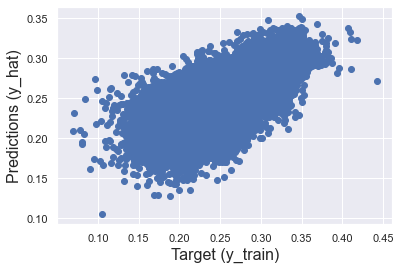

In [23]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size = 16)
plt.ylabel('Predictions (y_hat)', size = 16)
plt.show()

#### Our result is not perfect but it's clearly not random

Text(0.5, 1.0, 'residuals pdf')

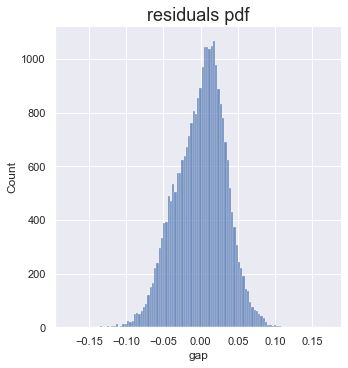

In [24]:
sns.displot(y_train - y_hat)
plt.title('residuals pdf', size=18)

#### it seems the error term is almost normally distributed, so we're good

In [25]:
r2 = reg.score(x_train,y_train)
r2

0.5017027403845993

#### R-squared is 0.5, which means our model predicts 50 percent of variability, which is not perfect 

In [26]:
n = inputs.shape[0]
p = inputs.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adj_r2

0.5015165751701456

#### but our adjusted R-squared is almost as same as our R-squared which is perfect this means there is almost no colinearity in our model

In [27]:
reg.intercept_

0.2512840713552057

In [28]:
reg.coef_

array([ 1.39495438e-03, -2.04564606e-03, -2.03409674e-03, -8.92019278e-03,
        4.49618596e-04,  1.29515205e-03,  9.56866188e-04, -1.07643769e-02,
       -1.12591549e-02, -8.72182262e-03, -5.62159258e-03, -5.38977207e-03,
       -4.02793565e-03,  5.70572072e-04,  1.79059455e-03,  2.73118238e-03,
       -2.02508715e-03,  6.86803419e-04,  3.99223757e-03, -1.00449200e-03,
       -5.34237047e-04,  1.93150633e-03,  1.43878298e-03, -8.81076264e-03,
       -2.47522001e-03, -5.63437351e-03,  4.23537347e-03, -6.09215657e-04,
        7.82784735e-03, -2.33448294e-03,  3.90878026e-04,  2.93302213e-04,
       -1.06996370e-03,  2.31769638e-03,  3.27303253e-03,  3.52545695e-03,
        1.71269391e-03, -1.49711544e-03,  2.35451471e-04, -1.34961523e-03,
       -9.08459999e-04,  5.04694460e-04,  5.99680775e-04,  4.68920372e-04,
       -2.42165503e-03, -9.66780279e-04, -2.44151373e-05,  2.71954957e-03,
        1.73757926e-03,  1.00338542e-02])

In [29]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,ftu20,0.001395
1,ftu21,-0.002046
2,ftu22,-0.002034
3,ftu28,-0.008920
4,ftu34,0.000450
5,ftu41,0.001295
6,ftu59,0.000957
7,ftu65,-0.010764
8,ftu66,-0.011259
9,ftu67,-0.008722


#### As shown at this table some features can be removed but since we're using weights but not coefficients the impact of small weights are so small that we can ignore them

In [30]:
y_hat_test = reg.predict(x_test)

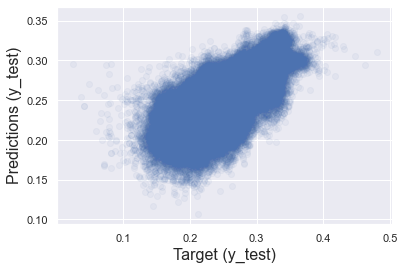

In [31]:
plt.scatter(y_test, y_hat_test, alpha = 0.05)
plt.xlabel('Target (y_test)', size = 16)
plt.ylabel('Predictions (y_test)', size = 16)
plt.show()

#### As shown in here 

Text(0.5, 1.0, 'residuals pdf')

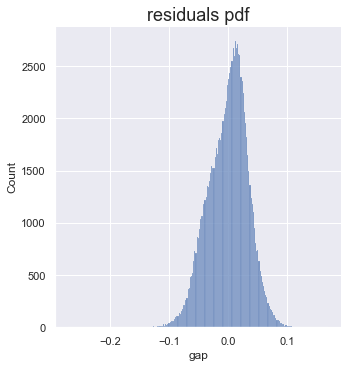

In [32]:
sns.displot(y_test - y_hat_test)
plt.title('residuals pdf', size=18)

#### This graph might be a bit confusing, please note that the peak of the graph does not resemble the mean

# Conclusion
#### because of our lack of prior knowledge about variables we can't decide if this model is good or not, depending on subject
#### an R-squared of 0.5 might be perfect, we could make R-squared go a bit higher by involving other variables but we would've
#### made an overfitting error, we've made this model as simple as possible.